In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import os
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
LE4PD_master={}
ensembles_master={}
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['3ttp','2pc0','1q9p']
with open(f'{data_prefix}LE4PD_master_eric.pkl','rb') as f:
  le4pd = pickle.load(f)
with open(f'{data_prefix}generative_ML_ensembles_eric.pkl','rb') as g:
  ensemble = pickle.load(g)
for sys in sys_names:

  LE4PD_master[sys]=le4pd[sys]
  ensembles_master[sys]=ensemble[sys]

In [7]:
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['1ebw','4z4x','6p9a']
for sys in sys_names:
  with open(f'{data_prefix}LE4PD_MD_{sys}.pkl','rb') as f:
    le4pd = pickle.load(f)
  with open(f'{data_prefix}Ensemble_structures_{sys}.pkl','rb') as g:
    ensemble = pickle.load(g)
  LE4PD_master[sys]=le4pd
  ensembles_master[sys]=ensemble

In [8]:
del le4pd, ensemble

In [9]:
# stores the stuctural ensembles that must be transformed prior to projection
# into the LE4PD mode space
ensembles_master.keys(),ensembles_master[sys_names[0]].keys(),ensembles_master[sys_names[0]]['AF2'].keys()

(dict_keys(['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']),
 dict_keys(['AF2', 'MDsamples', 'AFc', 'BioEMU', 'DiG']),
 dict_keys([8, 16, 32, 64, 128, 256, 512]))

In [10]:
LE4PD_master.keys(),LE4PD_master[sys_names[0]].keys(),LE4PD_master[sys_names[0]]['MD'].keys()

(dict_keys(['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']),
 dict_keys(['MD', 'vec', 'mean']),
 dict_keys([0, 1, 2, 3, 4, 5, 114, 260]))

In [11]:
def get_loadings_res(vec):
  weights = np.zeros((vec.shape[0] // 3, vec.shape[1]))
  for n, _ in enumerate(range(0, vec.shape[0], 3)):
    for a in range(vec.shape[1]):
        weights[n,a] = (vec[_:_+3,a]**2).sum(0)
  return weights

def find_deep_fake(fes):
    return (fes==np.inf).sum()/len(fes)

def get_fes(xdata,ydata,bins=50):
  h,x,y=np.histogram2d(xdata,ydata,bins=50)
  x=(x[:-1]+x[1:])/2
  y=(y[:-1]+y[1:])/2
  f=-np.log(h).T
  f-=f.min()
  return f,x,y

In [18]:
sys_names=['3ttp','2pc0','1q9p','1ebw','4z4x','6p9a']

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T
/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T
/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T
/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T
/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T
/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


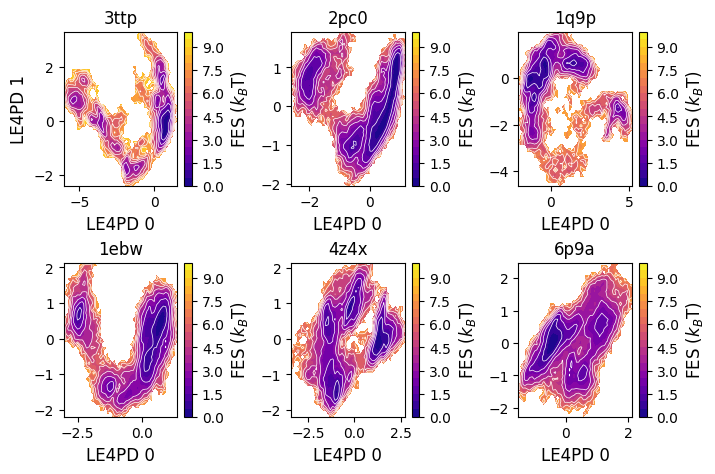

In [14]:
mode1=0
mode2=1
l=np.linspace(0,10,21)
plt.figure(figsize=(7.7,5)) #US-letter width
ticksize=10
labelsize=12

# go ahead and find the deepfakes here
fes_traj_list = []
for ii,sys in enumerate(sys_names):
  xdata=LE4PD_master[sys]['MD'][mode1]
  ydata=LE4PD_master[sys]['MD'][mode2]
  f,x,y = get_fes(xdata=xdata,ydata=ydata,bins=50)

  plt.subplot(2,3,ii+1)
  plt.contourf(x, y, f, levels = l,cmap='plasma')
  # if ii == len(sys_names)-1:
  cb=plt.colorbar()
  cb.set_ticklabels(l,fontsize=ticksize)
  cb.set_label('FES ($k_B$T)',fontsize=labelsize)
  plt.contour(x, y, f, levels = l[::2],colors='w',linewidths=0.5)
  if ii == 0:
    plt.ylabel(f'LE4PD {mode2}',fontsize=labelsize);
  plt.xlabel(f'LE4PD {mode1}',fontsize=labelsize) ;
  plt.title(f'{sys}',fontsize=labelsize);
  plt.xticks(fontsize=ticksize);
  plt.yticks(fontsize=ticksize);
  # plt.legend(fontsize=18);




plt.subplots_adjust(hspace=0.5,wspace=0.6)
plt.show()

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


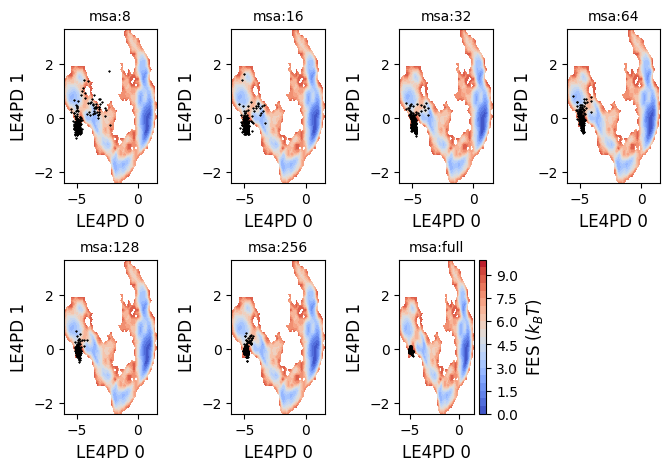

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


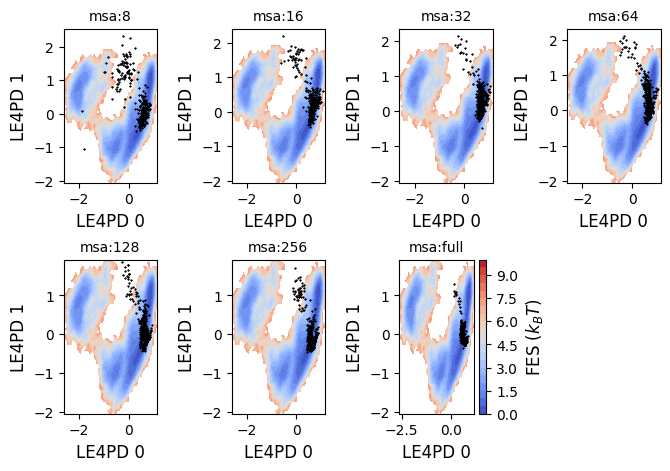

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


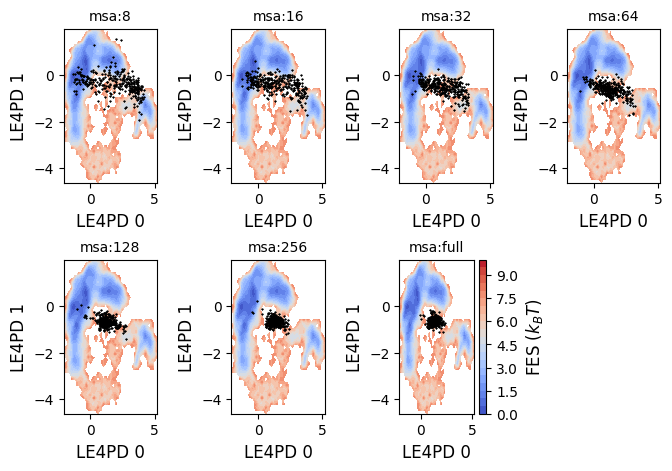

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


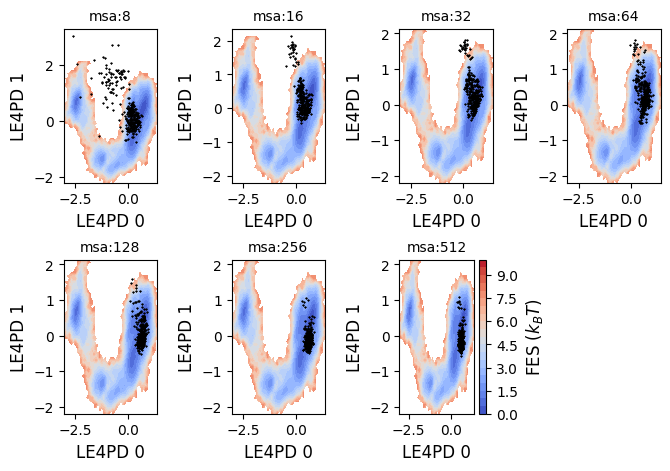

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


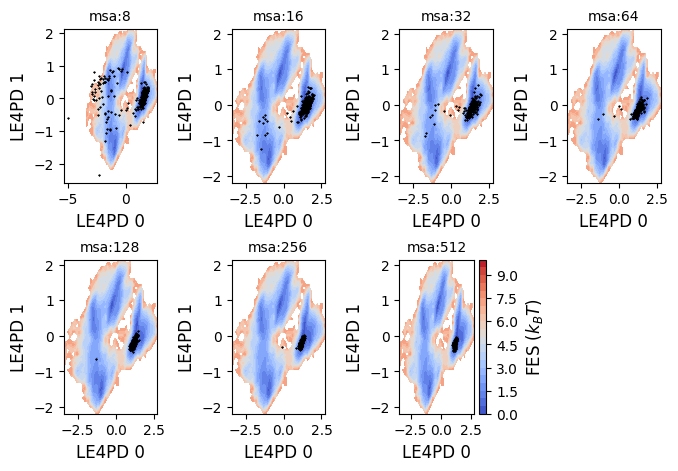

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


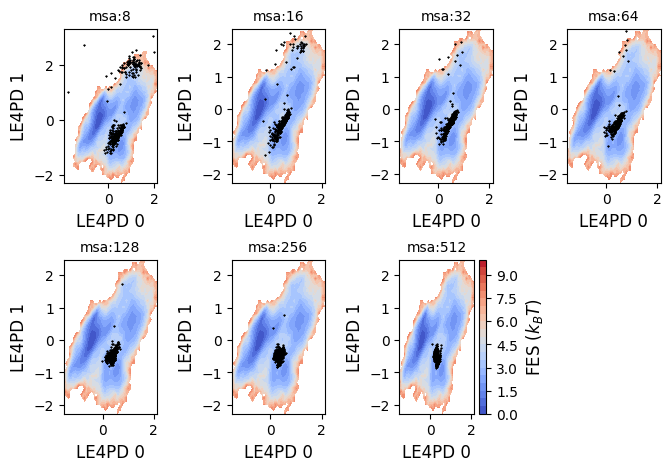

In [15]:
mode1=0
mode2=1
l=np.linspace(0,10,21)
sys_names=['3ttp','2pc0','1q9p','1ebw','4z4x','6p9a']
ticksize=10
labelsize=12
markersize=1

for ii,sys in enumerate(sys_names):
  xdata=LE4PD_master[sys]['MD'][mode1]
  ydata=LE4PD_master[sys]['MD'][mode2]
  f,x,y = get_fes(xdata=xdata,ydata=ydata,bins=50)

  plt.figure(figsize=(7.7,5))

  msas= ensembles_master[sys]['AF2'].keys()
  for jj,msa in enumerate(msas):
    dtraj_af = np.copy(ensembles_master[sys]['AF2'][msa])
    #if sys in ['1ebw','4z4x','6p9a']:
    for kk in range(dtraj_af.shape[0]):
        dtraj_af[kk,:] = dtraj_af[kk,:] - LE4PD_master[sys]['mean'][kk]

    LE4PD_af1=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode1])
    LE4PD_af2=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode2])

    plt.subplot(2,4,jj+1)
    plt.contourf(x, y, f, levels = l,cmap='coolwarm')
    if jj == len(msas)-1:
      cb=plt.colorbar()
      cb.set_ticklabels(l,fontsize=ticksize)
      cb.set_label('FES ($k_B T$)',fontsize=labelsize)
#   plt.contour(x, y, f, levels = levels[::2],colors='w',linewidths=0.8)
    plt.plot(LE4PD_af1,LE4PD_af2,'*k', markersize=markersize)

    plt.xlabel(f'LE4PD {mode1}',fontsize=labelsize) ;
    plt.ylabel(f'LE4PD {mode2}',fontsize=labelsize);
    plt.xticks(fontsize=ticksize);
    plt.yticks(fontsize=ticksize);
    plt.title(f"msa:{msa}",fontsize=ticksize);
#     plt.ylim([-2.3,3.3])
#     plt.xlim([-3.3,3.0])
  plt.subplots_adjust(hspace=0.5,wspace=0.8)
  plt.show()


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


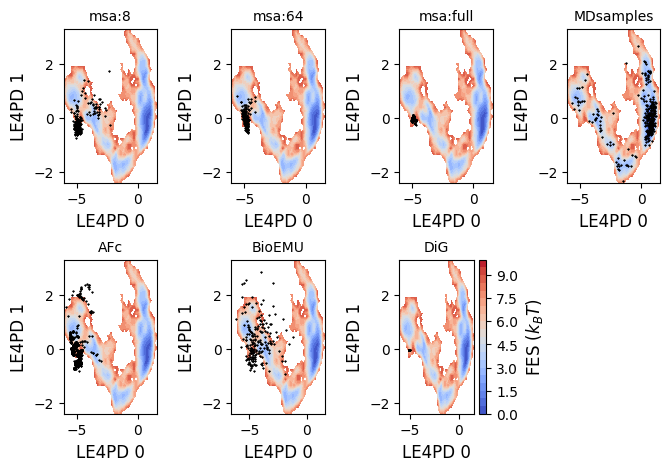

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


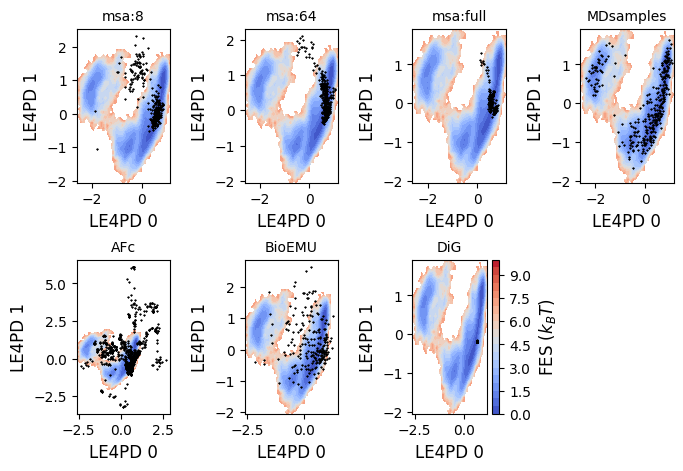

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


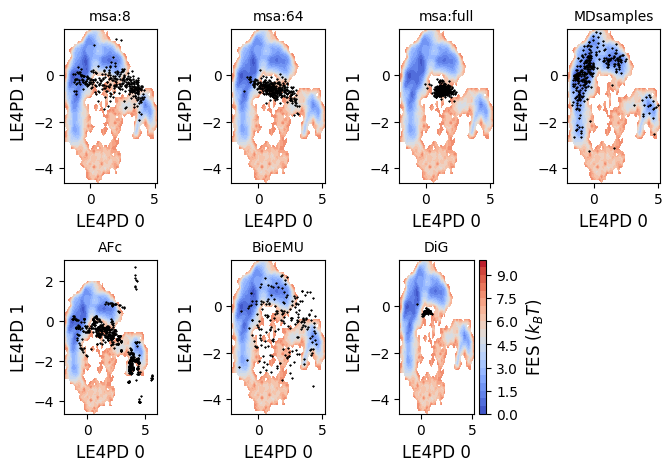

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


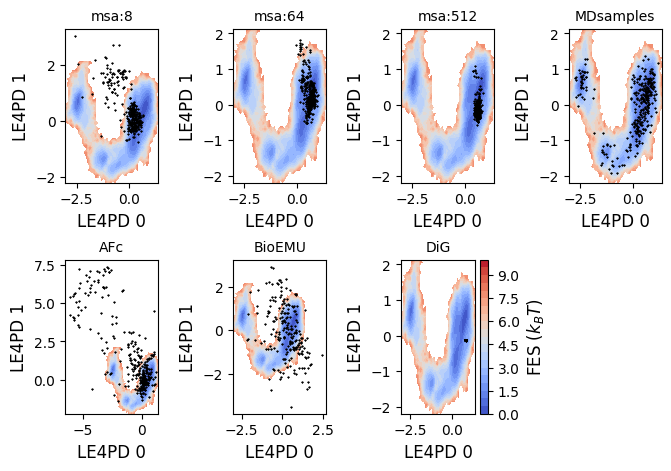

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


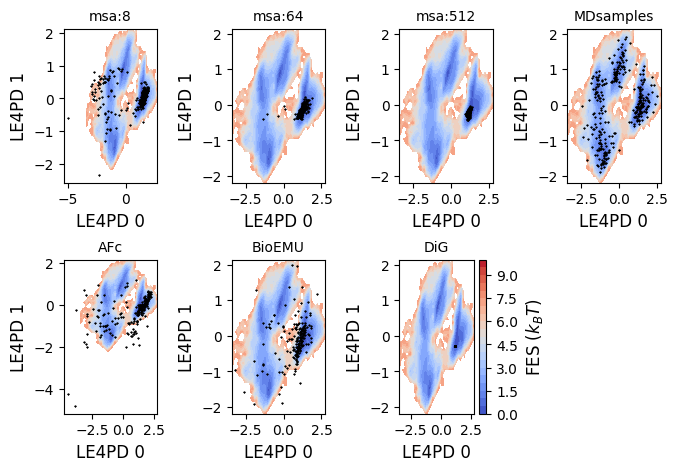

/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


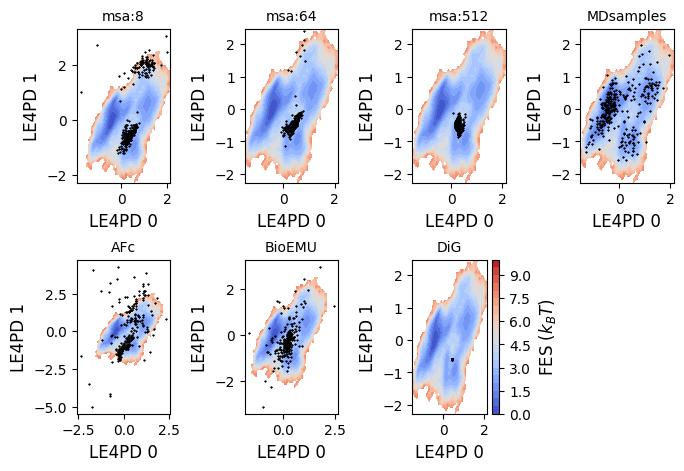

In [25]:
mode1=0
mode2=1
l=np.linspace(0,10,21)

ticksize=10
labelsize=12
markersize=1

deepfakes = {}
methods=[8,64,512,'MDsamples', 'AFc', 'BioEMU', 'DiG']
for ii,sys in enumerate(sys_names):
  deepfakes[sys] = {}
  xdata=LE4PD_master[sys]['MD'][mode1]
  ydata=LE4PD_master[sys]['MD'][mode2]
  f,x,y = get_fes(xdata=xdata,ydata=ydata,bins=50)

  plt.figure(figsize=(7.7,5))

  for jj,meth in enumerate(methods):
    if meth not in list(ensembles_master[sys].keys()):
      if (meth == 512) and (sys in ['3ttp', '2pc0', '1q9p']):
        meth = 'full'
      dtraj_af = np.copy(ensembles_master[sys]['AF2'][meth])
    else:
      dtraj_af = np.copy(ensembles_master[sys][meth])
    for kk in range(dtraj_af.shape[0]):
        dtraj_af[kk,:] = dtraj_af[kk,:] - LE4PD_master[sys]['mean'][kk]

    LE4PD_af1=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode1])
    LE4PD_af2=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode2])

    plt.subplot(2,4,jj+1)
    plt.contourf(x, y, f, levels = l,cmap='coolwarm')
    if jj == len(methods)-1:
      cb=plt.colorbar()
      cb.set_ticklabels(l,fontsize=ticksize)
      cb.set_label('FES ($k_B T$)',fontsize=labelsize)
#   plt.contour(x, y, f, levels = levels[::2],colors='w',linewidths=0.8)
    plt.plot(LE4PD_af1,LE4PD_af2,'*k', markersize=markersize)

    plt.xlabel(f'LE4PD {mode1}',fontsize=labelsize) ;
    plt.ylabel(f'LE4PD {mode2}',fontsize=labelsize);
    plt.xticks(fontsize=ticksize);
    plt.yticks(fontsize=ticksize);
    if meth not in list(ensembles_master[sys].keys()):
      plt.title(f"msa:{meth}",fontsize=ticksize);
    else:
      plt.title(f"{meth}",fontsize=ticksize);
#     plt.ylim([-2.3,3.3])
#     plt.xlim([-3.3,3.0])

    # get the fraction of deepfakes
    minx = (abs(LE4PD_af1[:,None] - x)).argmin(1)
    miny = (abs(LE4PD_af2[:,None] - y)).argmin(1)
    fes_traj = f[miny, minx]
    deepfakes[sys][meth] = np.sum(fes_traj == np.inf) / len(fes_traj)

    fes_traj_list.append(fes_traj)
  plt.subplots_adjust(hspace=0.5,wspace=0.8)
  plt.show()


# Figures for paper

In [19]:
sys_names

['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']

In [23]:
mm

array([], dtype=int64)

3ttp


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


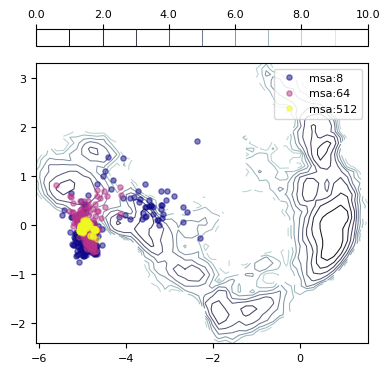

2pc0


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


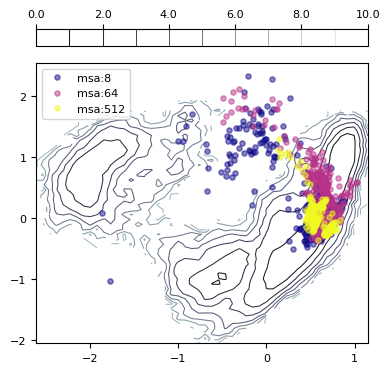

1q9p


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


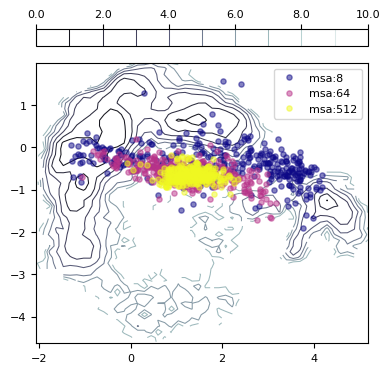

1ebw


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


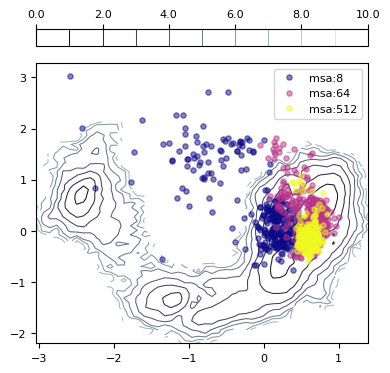

4z4x


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


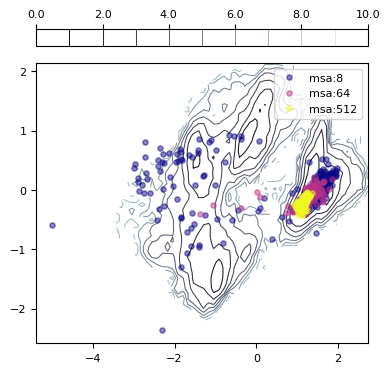

6p9a


/tmp/ipython-input-11-3113709034.py:15: RuntimeWarning: divide by zero encountered in log
  f=-np.log(h).T


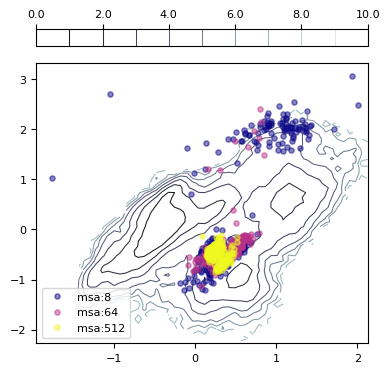

In [24]:
msas_list=np.array([8,16,32,64,128,256,'full'])
colors = plt.cm.plasma(np.linspace(0, 1, len(msas_list)+1))

mode1=0
mode2=1
l=np.linspace(0,10,51)

ticksize=8
labelsize=12
markersize=7.5


methods=[8,64,512]
for sys in sys_names:
  print(sys)
  plt.figure(figsize=(4,4))
  xdata=LE4PD_master[sys]['MD'][mode1]
  ydata=LE4PD_master[sys]['MD'][mode2]
  f,x,y = get_fes(xdata=xdata,ydata=ydata,bins=50)

  # plt.contourf(x, y, f, levels = l[::5],cmap='bone_r',alpha=0.9)
  plt.contour(x, y, f, levels = l[::5],cmap='bone',linewidths=0.75)
  # if ii == len(sys_names)-1:
  cb=plt.colorbar(location='top')
  cb.set_ticklabels(l[::5],label=[f"{val:1.3}" for val in l[::5]],fontsize=ticksize)
  # cb.set_label('FES ($k_B T$)',fontsize=labelsize)

  for jj,meth in enumerate(methods):

    if meth not in list(ensembles_master[sys].keys()):
      if (meth == 512) and (sys in ['3ttp', '2pc0', '1q9p']):
        meth = 'full'
        dtraj_af = np.copy(ensembles_master[sys]['AF2']['full'])
      else:
        dtraj_af = np.copy(ensembles_master[sys]['AF2'][meth])
    else:
      dtraj_af = np.copy(ensembles_master[sys][meth])
    for kk in range(dtraj_af.shape[0]):
        dtraj_af[kk,:] = dtraj_af[kk,:] - LE4PD_master[sys]['mean'][kk]

    LE4PD_af1=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode1])
    LE4PD_af2=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode2])

    if meth not in list(ensembles_master[sys].keys()):
      mm=np.where(msas_list==str(meth))[0]
      if meth == 'full':
        meth = 512
        mm = -1
      if meth == 512: mm = -1
      plt.plot(LE4PD_af1,LE4PD_af2,'.', markersize=markersize,label=f"msa:{meth}",alpha=0.5,c=colors[mm])
    else:
      plt.plot(LE4PD_af1,LE4PD_af2,'.', markersize=markersize,label=f"{meth}",alpha=0.5)

  # plt.xlabel(f'LE4PD {mode1}',fontsize=labelsize) ;
  # plt.ylabel(f'LE4PD {mode2}',fontsize=labelsize);
  plt.xticks(fontsize=ticksize);
  plt.yticks(fontsize=ticksize);
  # plt.title(f'{sys}',fontsize=labelsize);
  plt.legend(fontsize=ticksize,ncols=1)
  plt.tight_layout();
  # plt.subplots_adjust(hspace=0.1);
  plt.savefig(f'/content/drive/MyDrive/AF2_dynamics/figures/fes_{sys}.png',dpi=600);
  plt.show()
  plt.close()

In [ ]:
ensembles_master['1ebw']['AF2'].keys()

dict_keys([8, 16, 32, 64, 128, 256, 512])

In [ ]:
msas_list=np.array([8,16,32,64,128,256,512])
colors = plt.cm.plasma(np.linspace(0, 1, len(msas_list)+1))

mode1=0
mode2=1
l=np.linspace(0,10,51)

ticksize=8
labelsize=12
markersize=7.5

methods=[8, 64, 512]

var0 = np.zeros((len(sys_names), len(methods)))
var1 = np.zeros((len(sys_names), len(methods)))

for ii, sys in enumerate(sys_names):

  for jj,meth in enumerate(methods):
    if type(meth) is int:
      if (meth == 512) and (sys in ['3ttp', '2pc0', '1q9p']):
        meth = 'full'
      dtraj_af = np.copy(ensembles_master[sys]['AF2'][meth])
    else:
      dtraj_af = np.copy(ensembles_master[sys][meth])
    for kk in range(dtraj_af.shape[0]):
        dtraj_af[kk,:] = dtraj_af[kk,:] - LE4PD_master[sys]['mean'][kk]

    LE4PD_af1=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode1])
    LE4PD_af2=np.dot(dtraj_af.T, LE4PD_master[sys]['vec'][mode2])

    var0[ii,jj] = LE4PD_af1.var()
    var1[ii,jj] = LE4PD_af2.var()

In [ ]:
# variance calculations

for i, sys in enumerate(sys_names):
  var0[i,:] = var0[i,:] / LE4PD_master[sys]['MD'][mode1].var()
  var1[i,:] = var1[i,:] / LE4PD_master[sys]['MD'][mode2].var()

In [ ]:
colors = plt.cm.plasma(np.linspace(0, 1, len(methods)))


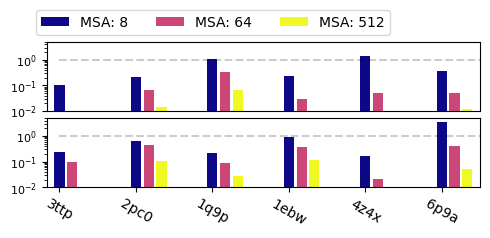

In [ ]:
plt.figure(figsize=(5,2.5))

plt.subplot(2,1,1)
xx_list = []
for ss,sys in enumerate(sys_names):
  xx=ss*len(sys_names)
  xx_list.append(xx)
  SYS=sys
  for ii, msa in enumerate(methods):
    if ss == 0:
      if type(msa) is int:
        plt.bar(xx,var0[ss,ii],color=colors[ii], label = 'MSA: ' + str(msa))
      else:
        plt.bar(xx,var0[ss,ii],color=colors[ii], label = str(msa))
    else:
      plt.bar(xx,var0[ss,ii],color=colors[ii])
    xx+=1
plt.plot([0,xx],[1,1],'--k',alpha=0.2)
plt.ylim([0.01,5.])
plt.xlim([-1,xx])
plt.yscale('log')
plt.legend(ncols = 4, loc = (-.025,1.1))
plt.yticks(fontsize=8)
plt.xticks([])

plt.subplot(2,1,2)
for ss,sys in enumerate(sys_names):
  xx=ss*len(sys_names)
  SYS=sys
  for ii, msa in enumerate(methods):
    plt.bar(xx,var1[ss,ii],color=colors[ii])
    xx+=1
plt.plot([0,xx],[1,1],'--k',alpha=0.2)
plt.ylim([0.01,5.0])
plt.xlim([-1,xx])
plt.yscale('log')
plt.yticks(fontsize=8)
plt.xticks(xx_list, sys_names, rotation = -30)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.25)

plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/rel_var_fig3.png',dpi=600);
#plt.savefig('/content/pearson_correl_slopes_all.png',dpi=600);
plt.show()
plt.close()

In [ ]:
methods = [8, 64, 512]
colors = plt.cm.plasma(np.linspace(0, 1, len(methods)))


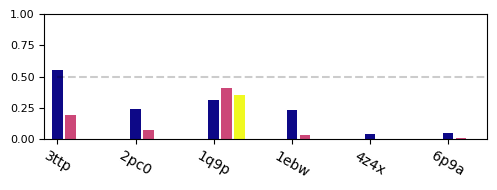

In [ ]:
plt.figure(figsize=(5,2))


xx_list = []
plt.subplot(1,1,1)
for ss,sys in enumerate(sys_names):
  xx=ss*len(sys_names)
  xx_list.append(xx)
  SYS=sys
  for ii, msa in enumerate(methods):
    if (msa == 512) and (sys in ['3ttp', '2pc0', '1q9p']):
      msa = 'full'
    #print(sys, msa)
    plt.bar(xx,deepfakes[sys][msa],color=colors[ii])
    xx+=1
plt.plot([0,xx],[0.5,0.5],'--k',alpha=0.2)
plt.ylim([0.0,1.0])
plt.xlim([-1,xx])
#plt.yscale('log')
plt.yticks(fontsize=8)
plt.xticks(xx_list, sys_names, rotation = -30)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.4)

plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/fig3_deepfakes_all.png',dpi=600);
#plt.savefig('/content/pearson_correl_slopes_all.png',dpi=600);
plt.show()
plt.close()

In [ ]:
msa

'full'